In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io.wavfile as wv
import os

In [2]:
print('hello')

hello


In [4]:
datadir = "/home/mcmanus/lto-airspy/lto-airspy/build/airspy-tools/src/data.new"
os.listdir(datadir)

['rxmon_20210215_031913.wav',
 'rxmon_20210215_031922.wav',
 'rxmon_20210215_031902.wav',
 'rxmon_20210215_031932.wav',
 'rxmon_20210215_031853.wav']

In [3]:
def get_pwr_from_wv(wvpath):
    rate, obs = wv.read(wvpath)
    obs_f = obs.astype(float)
    s = np.sqrt(obs_f)

In [6]:
def get_wav_stats(wvpath, resolution = 0.001):
    """
    resolution in milliseconds
    """
    with open(wvpath, 'rb') as wav:
        rate, obs = wv.read(wav, mmap=True)
        framesize = int(rate*resolution)
        nframes = obs.shape[0] // framesize
        
        nobs = framesize*nframes
        pwr = np.sqrt(np.square(obs.astype(float)).sum(axis=1))[:nobs].reshape((nframes, framesize))
        
        #time midpoint for each frame
        t_sec = np.arange(nframes)*resolution + resolution/2
        
        ret_dict = {"t_sec":    t_sec,
                    "pwr_min":  pwr.min(axis=1),
                    "pwr_mean": pwr.mean(axis=1),
                    "pwr_max":  pwr.max(axis=1)
                   }
        
    return ret_dict    

In [ ]:
wvpath = 'data.test/longsample.wav'
stats = get_wav_stats(wvpath)

In [ ]:
s=slice(1, None, None)

fig = plt.figure(figsize=(12,9))
ax = fig.subplots(1,1)
ax.plot(stats['t_sec'][s], stats['pwr_min'][s], color='blue', label='Min')
ax.plot(stats['t_sec'][s], stats['pwr_mean'][s], color='red', label='Mean')
ax.plot(stats['t_sec'][s], stats['pwr_max'][s], color='green', label='Max')
ax.set_ylabel(r'$(I^2\ +\ Q^2)^\frac{1}{2}$', size=16)
ax.set_xlabel('Time (Seconds)')
ax.grid()
ax.legend()

In [7]:
#wvpath = 'AirSpy_20201229_185852Z_1420405kHz_IQ.wav'

old_stats = {}
for f in os.listdir(datadir):
    wvpath = os.path.join(datadir, f)
    bn = os.path.basename(f)
    old_stats[f] = get_wav_stats(wvpath)

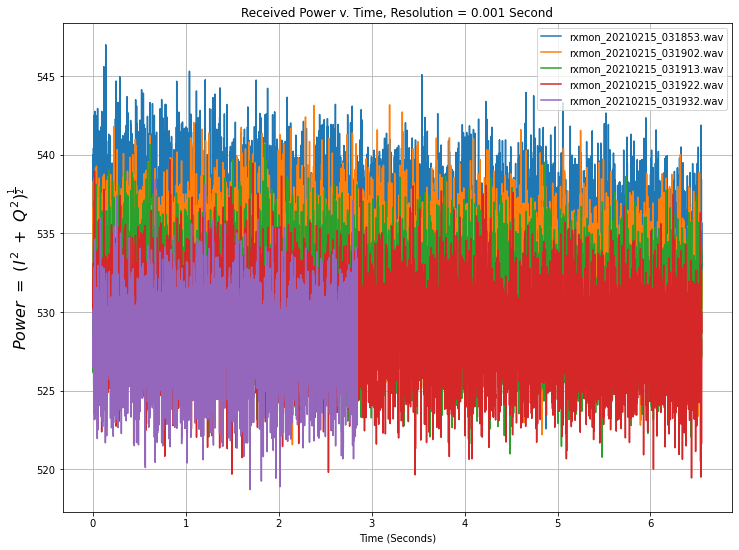

In [8]:
s=slice(None, None, None)

fig = plt.figure(figsize=(12,9))
ax = fig.subplots(1,1)

test_list = list(old_stats.keys())
test_list.sort(reverse=False)

for t in test_list:
    if t == 'longsample.wav':
        continue
    ax.plot(old_stats[t]['t_sec'][s], old_stats[t]['pwr_mean'][s],  label=t)
    
ax.set_ylabel(r'$Power\ =\ (I^2\ +\ Q^2)^\frac{1}{2}$', size=16)
ax.set_title('Received Power v. Time, Resolution = 0.001 Second')
ax.set_xlabel('Time (Seconds)')
ax.grid()
ax.legend()

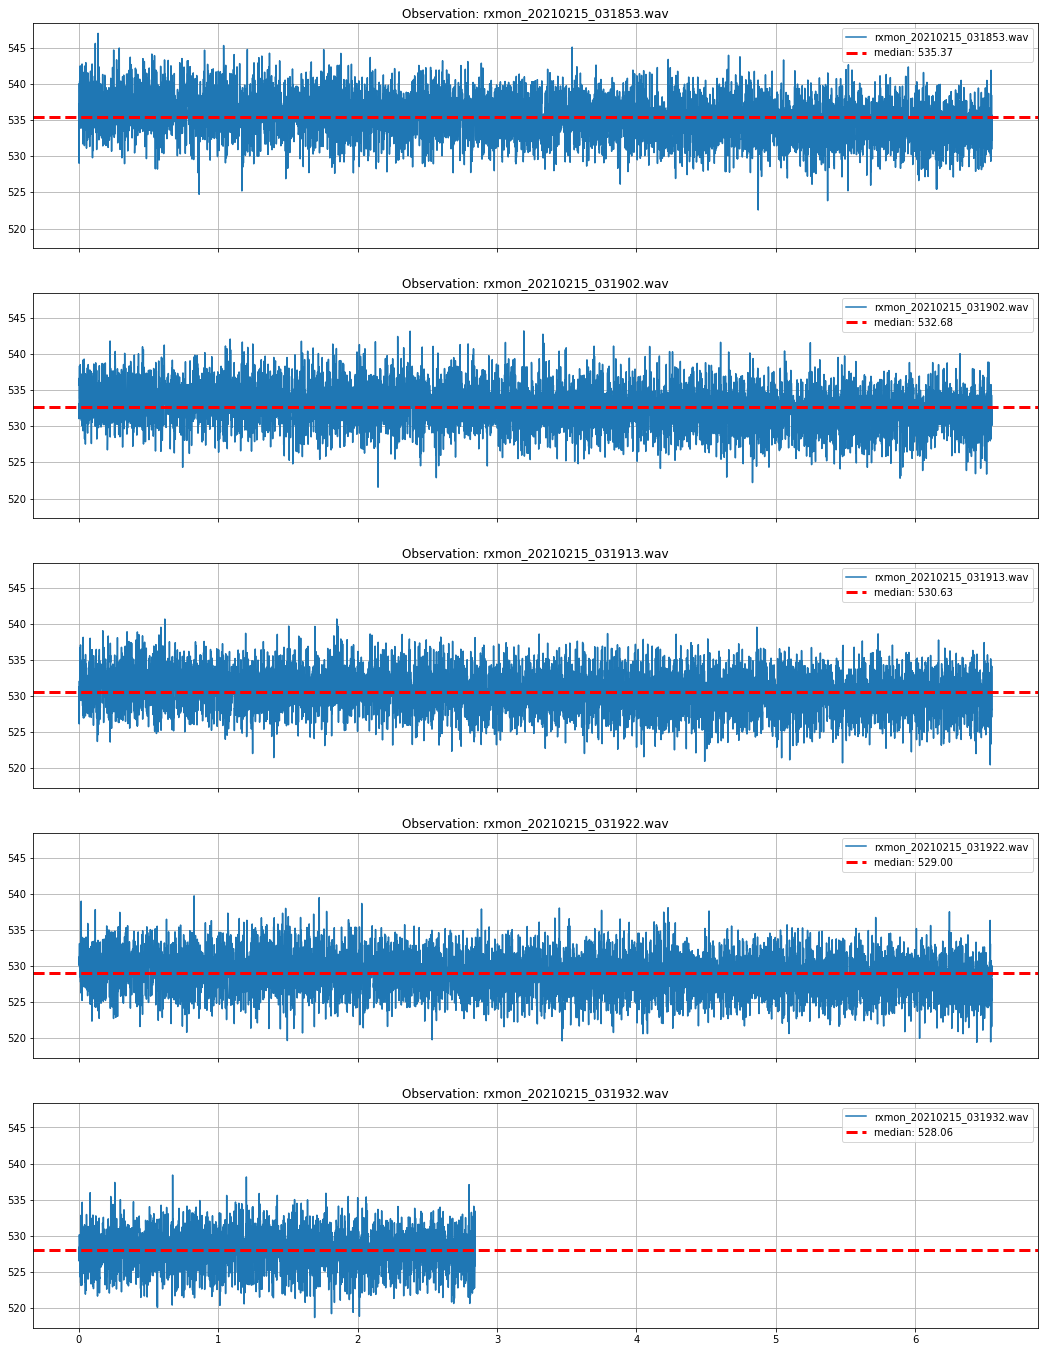

In [18]:
s=slice(None, None, None)

fig = plt.figure(figsize=(18,24))


test_list = list(old_stats.keys())
test_list.sort(reverse=False)
n = len(test_list)
axs = fig.subplots(n,1, sharex=True, sharey=True)

for t, ax in zip(test_list, axs):
    med = np.median(old_stats[t]['pwr_mean'][s])
    ax.plot(old_stats[t]['t_sec'][s], old_stats[t]['pwr_mean'][s],  label=t)
    ax.axhline(med,lw=3, ls='--', label=f'median: {med:.2f}', color='red')
    ax.grid()
    ax.legend()
    ax.set_title(f'Observation: {t}')
    


In [ ]:
obs.shape

In [ ]:
wvdir = 'data.test'
for f in ['test1.wav']:
    wvpath = os.path.join(wvdir, f)
    print(f'\n----------- file: {f}')
    with open(wvpath, 'rb') as wav:
        rate, obs = wv.read(wav, mmap=True)
        print( obs[:10])

In [ ]:
obs.dtype

In [9]:
wvdir = datadir
for f in os.listdir(wvdir):
    wvpath = os.path.join(wvdir, f)
    print(f'\n----------- file: {f}')
    rate, obs = wv.read(wvpath, mmap=True)
    print( obs[:10])


----------- file: rxmon_20210215_031913.wav
[[-727  675]
 [-113 -435]
 [-284    8]
 [-972  271]
 [-360  422]
 [  56 -268]
 [ -27 -338]
 [-519  127]
 [-939 -570]
 [ 293  558]]

----------- file: rxmon_20210215_031922.wav
[[ 440  862]
 [1293  825]
 [-147   62]
 [ 937  992]
 [ 351 -345]
 [-173 -689]
 [ 314  471]
 [ 647  130]
 [  83  204]
 [-147 -731]]

----------- file: rxmon_20210215_031902.wav
[[ -18 -209]
 [ -14  619]
 [  78  -62]
 [ 123  -70]
 [   3  -38]
 [-191   41]
 [ 965  783]
 [-367 -126]
 [-730  225]
 [  -4  469]]

----------- file: rxmon_20210215_031932.wav
[[ 189  505]
 [-176  469]
 [  42  435]
 [-782  813]
 [  -7 -241]
 [-261 -352]
 [-437 1046]
 [ 630 -126]
 [ 367  334]
 [-423   89]]

----------- file: rxmon_20210215_031853.wav
[[-430 -475]
 [ 451 -479]
 [ 864  246]
 [-303  -59]
 [ -76 -202]
 [ -26  392]
 [ 384 -893]
 [ 298 -119]
 [-622  109]
 [-441  390]]


In [19]:
old_datadir = "/home/mcmanus/lto-airspy/lto-airspy/build/airspy-tools/src/data.old"

In [20]:
wvdir = old_datadir
for f in os.listdir(wvdir):
    wvpath = os.path.join(wvdir, f)
    print(f'\n----------- file: {f}')
    rate, obs = wv.read(wvpath, mmap=True)
    print( obs[:10])


----------- file: test_2021_02_15.wav
[[   -1     0]
 [    0     0]
 [   -1     0]
 [    1     0]
 [   -3     0]
 [    3     0]
 [   -5 22054]
 [    7     0]
 [  -12    32]
 [   17     0]]


In [21]:
old_stats = {}
for f in os.listdir(old_datadir):
    wvpath = os.path.join(old_datadir, f)
    bn = os.path.basename(f)
    old_stats[f] = get_wav_stats(wvpath)

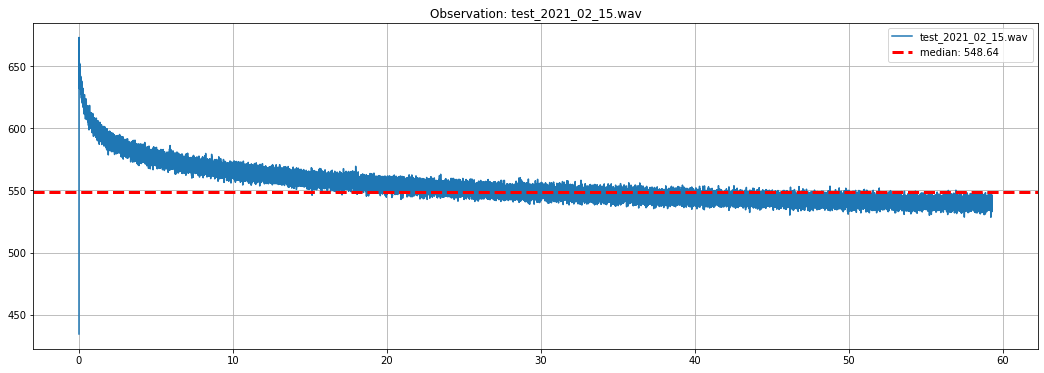

In [25]:
s=slice(None, None, None)

fig = plt.figure(figsize=(18,6))


test_list = list(old_stats.keys())
test_list.sort(reverse=False)
n = len(test_list)
axs = fig.subplots(n,1, sharex=True, sharey=True, squeeze=False)

for t, ax in zip(test_list, axs.flatten()):
    med = np.median(old_stats[t]['pwr_mean'][s])
    ax.plot(old_stats[t]['t_sec'][s], old_stats[t]['pwr_mean'][s],  label=t)
    ax.axhline(med,lw=3, ls='--', label=f'median: {med:.2f}', color='red')
    ax.grid()
    ax.legend()
    ax.set_title(f'Observation: {t}')

In [ ]:
s[:10]